# Walmart Sales Data Cleaning

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
%run common.py

# Data

## Sell Price

In [3]:
sell_price_data = pd.read_csv('data/sell_prices.csv')

sell_price_df = (sell_price_data
                 .pipe(start_pipeline)
                 .pipe(clean_sell_price))

sell_price_df.head()

start_pipeline took 0:00:00.110507, shape = (6841121, 4)
clean_sell_price took 0:00:00.411544, shape = (6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


## Calendar 

In [4]:
calendar_data = pd.read_csv('data/calendar.csv')

calendar_df = (calendar_data
 .pipe(start_pipeline)
 .pipe(clean_calendar))

calendar_df.head()

start_pipeline took 0:00:00.000287, shape = (1969, 14)
clean_calendar took 0:00:00.012946, shape = (1969, 13)


,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,
2011-01-29,11101,Saturday,5,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,11101,Sunday,6,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,11101,Monday,0,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,11101,Tuesday,1,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,11101,Wednesday,2,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


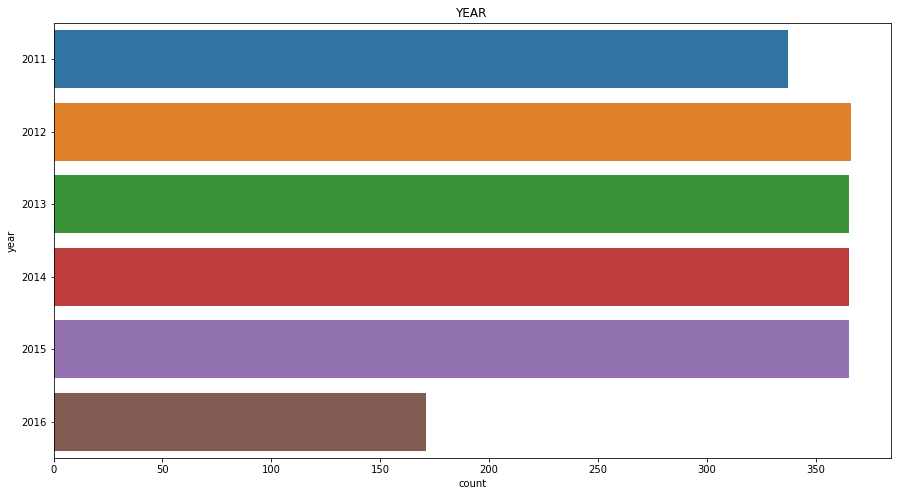

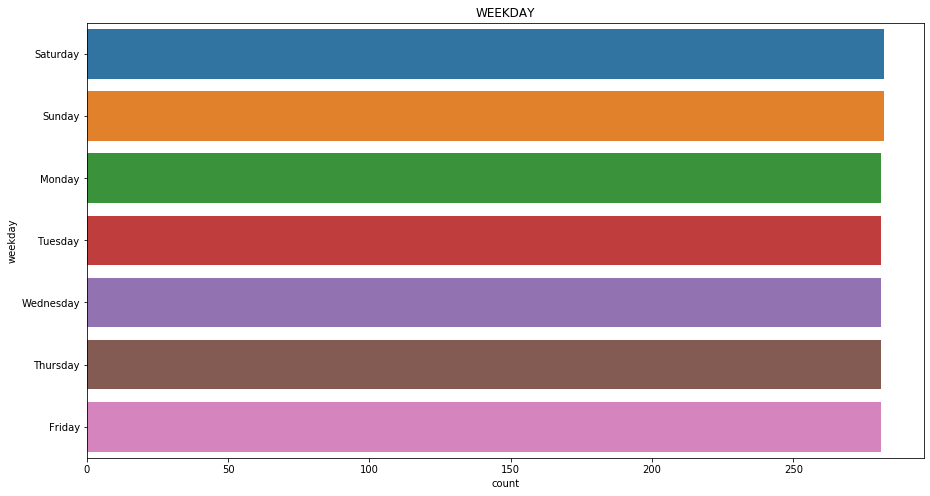

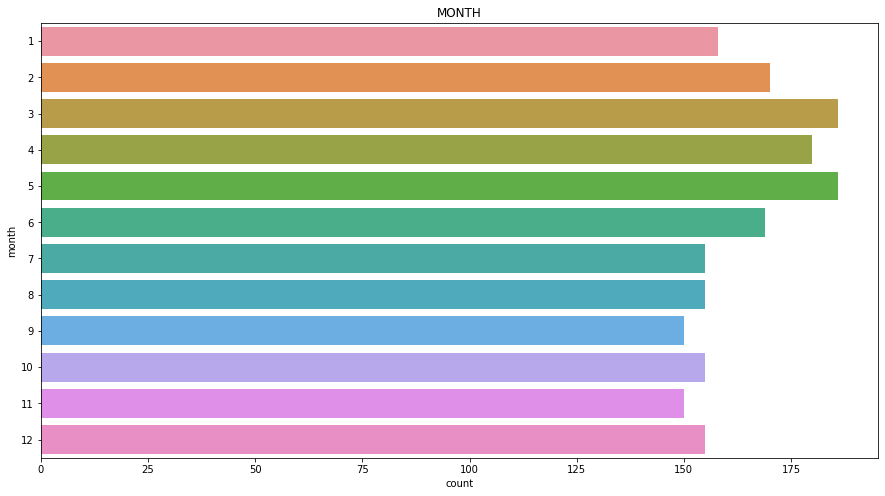

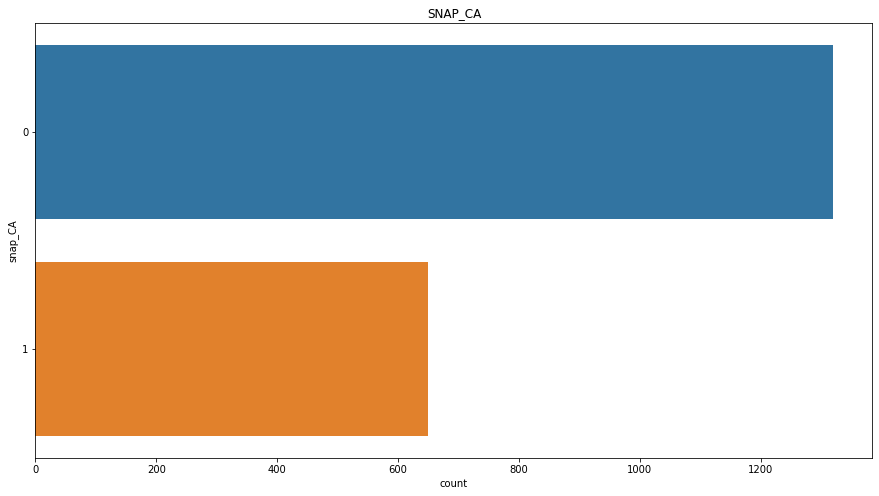

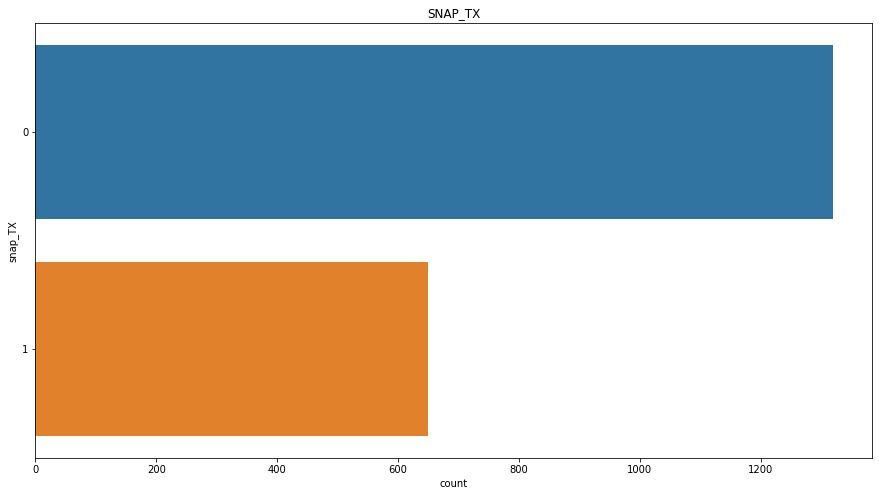

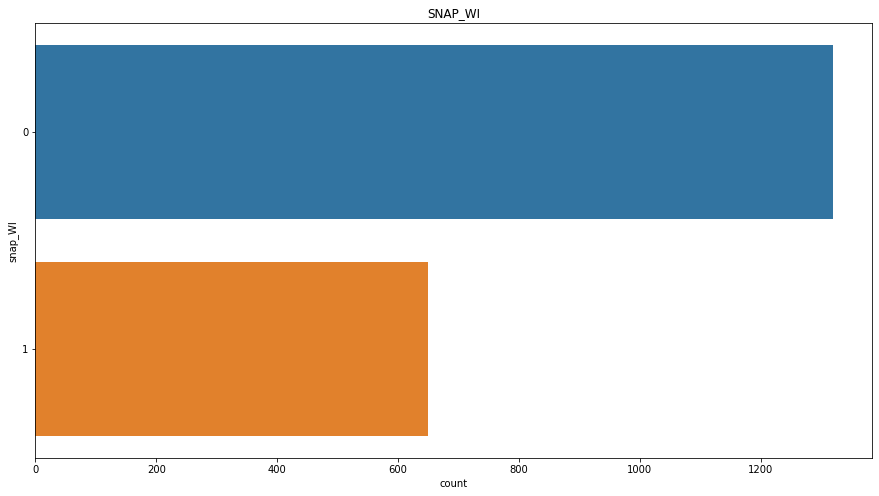

In [11]:
for col in (["year", "weekday", "month", "snap_CA", "snap_TX", "snap_WI"]):
    plt.figure(figsize = (15,8))
    g = sns.countplot(y =calendar_df[col])
    g.set_title(col.upper())

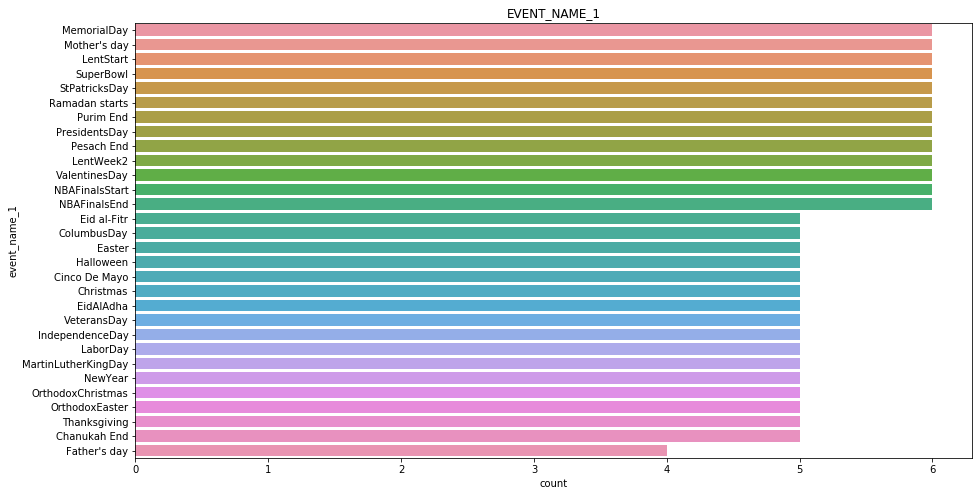

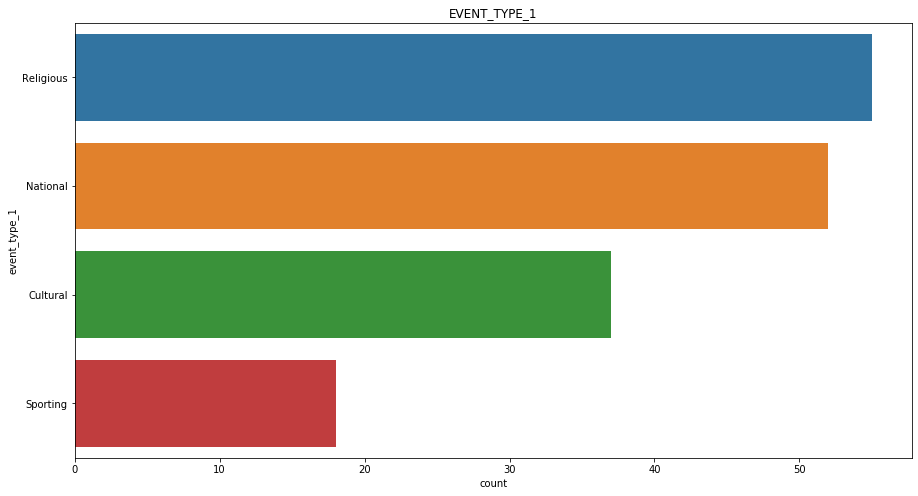

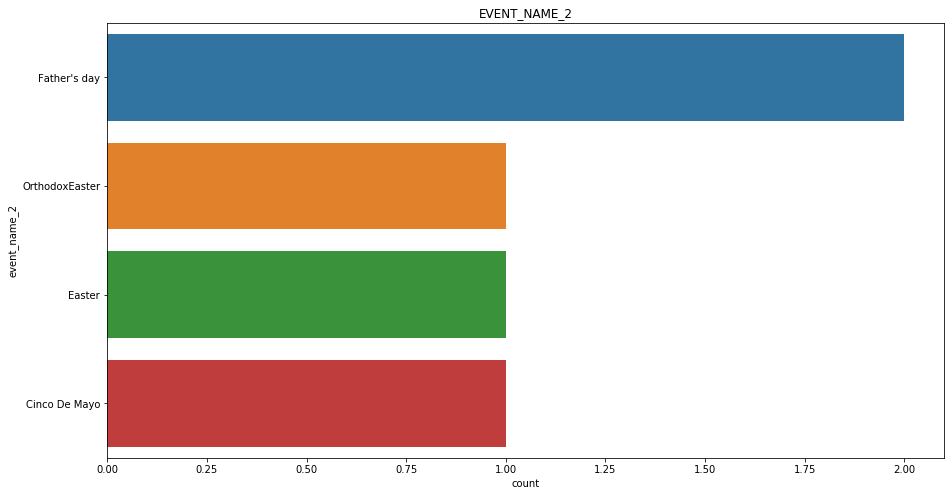

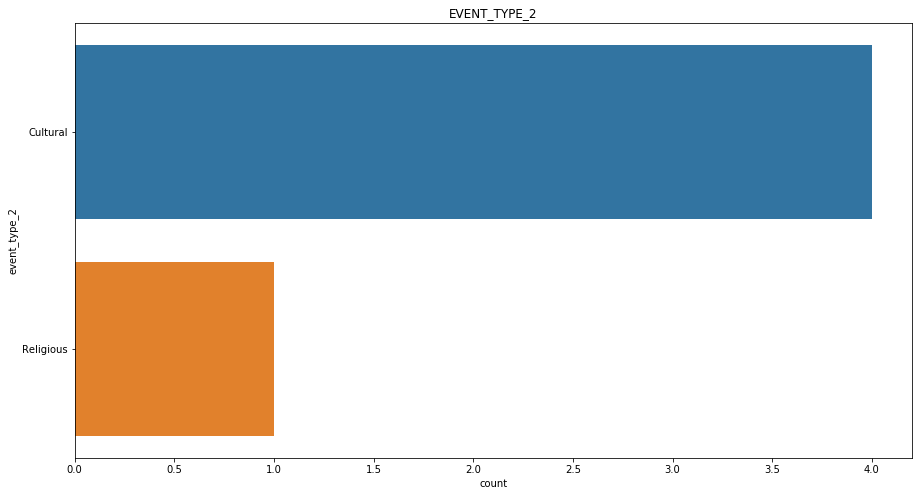

In [10]:
for col in (["event_name_1","event_type_1",
            "event_name_2", "event_type_2"]):
    plt.figure(figsize = (15,8))
    g = sns.countplot(y =calendar_df[col],
                      order = calendar_df[col].value_counts().index)
    g.set_title(col.upper())

Check for any missing dates

In [7]:
pd.date_range(start = calendar_df.index[0], end = calendar_df.index[-1] ).difference(calendar_df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

## Sample Train / Validation

In [8]:
sales_data = pd.read_csv('data/sales_train_validation.csv')

sales_df = (sales_data
 .pipe(start_pipeline)
 .pipe(clean_sales))

sales_df.head()

start_pipeline took 0:00:00.112974, shape = (30490, 1919)
clean_sales took 0:00:00.005677, shape = (30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [9]:
sales_example = build_sales('HOBBIES_1_001_CA_1_validation', sales_df, calendar_df)
sales_example.head()

build_sales took 0:00:00.030990, shape = (1913, 13)


,HOBBIES_1_001_CA_1_validation,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,
2011-01-29,0,11101,Saturday,5,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,0,11101,Sunday,6,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,0,11101,Monday,0,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,0,11101,Tuesday,1,2,2011,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,0,11101,Wednesday,2,2,2011,NaN,NaN,NaN,NaN,1,0,1
